#                                        Python Final Project 

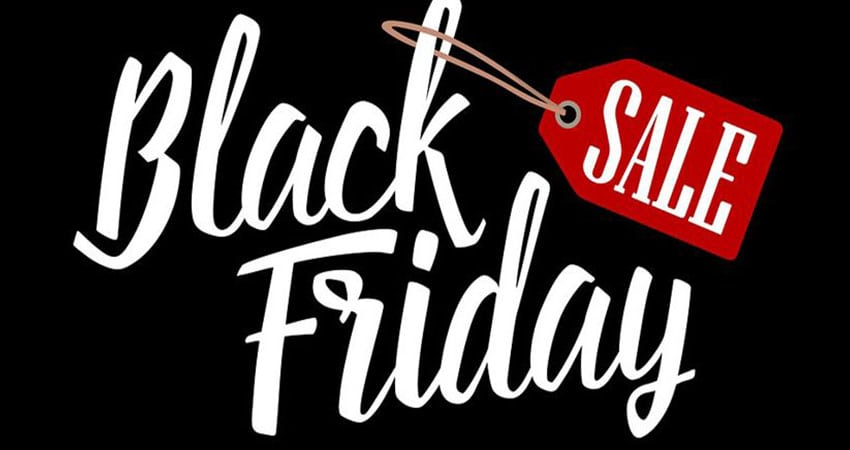

Black Friday is a colloquial term for the Friday following Thanksgiving Day in many countries. Many stores offer highly promoted sales on Black Friday and open very early, or some time on Thanksgiving Day. Black Friday has routinely been the busiest shopping day of the year in all the countries since at least 2005.

The earliest evidence of the phrase Black Friday originated in Philadelphia, dating back to at least 1961, where it was used by police to describe the heavy pedestrian and vehicular traffic that would occur on the day after Thanksgiving. This usage dates to at least 1961

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Data Content

Variable	              Definition

User_ID                   User ID
Product_ID	              Product ID
Gender	                  Sex of User
Age	                      Age in bins
Occupation	              Occupation(Masked)
City_Category	          Category of the City (A,B,C)
StayInCurrentCityYears	  Number of years stay in current city
Marital_Status	          Marital Status
ProductCategory1	      Product Category (Masked)
ProductCategory2	      Product may belongs to other category also (Masked)
ProductCategory3	      Product may belongs to other category also (Masked)
Purchase	              Purchase Amount (Target Variable)

# Hypothesis / Business Questions 

1) Which Gender does Purchase more?

2) Which city records maximum Purchase ?

3) Which Age category has high purchase ?

4) Which Product is sold more ?

5) Does stay in current city contribute to less or more purchase?

6) Does Marital status contribute to less or more purchase ?




## Project Objective

They have the actual purchase amount for the test dataset, against which your predictions will be evaluated. Models are scored on the root mean squared error (RMSE).Find which model will predict based on RSME
 

# Data Exploration

###### Importing libraries for the project 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
# Setting Directory 
import os 
os.chdir(r'E:\mine\python project\my project')
os.getcwd()

'E:\\mine\\python project\\my project'

In [4]:
# Loading the file to do EDA and Modelling and combining both the datasets and adding source and 
#train and test to columns to differientiate between train and test dataset.
# obtaining the total count of observations in train and test dataset

train=pd.read_csv('train.csv') # reading dataset
test=pd.read_csv('test.csv')
train['source']='train'
test['source']='test'

df=pd.concat([train,test],ignore_index=True,sort=True)
print(train.shape,test.shape)

(550068, 13) (233599, 12)


In [5]:
# total count of observations 
df.shape

(783667, 13)

In [6]:
# column names
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID',
       'source'],
      dtype='object')

In [8]:
df.head() # first 5 rows of the dataset

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,source
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,train
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,train
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,train
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,train
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002,train


In [7]:
df.tail() #last 5 rows of the dataset

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,source
783662,26-35,B,F,1,15,8,NaN,NaN,P00118942,NaN,4+,1006036,test
783663,26-35,B,F,1,15,5,8.0,NaN,P00254642,NaN,4+,1006036,test
783664,26-35,B,F,1,15,1,5.0,12.0,P00031842,NaN,4+,1006036,test
783665,46-50,C,F,0,1,10,16.0,NaN,P00124742,NaN,4+,1006037,test
783666,46-50,B,F,1,0,4,5.0,NaN,P00316642,NaN,4+,1006039,test


In [8]:
df.describe() #Five number summary of the numerical columns in the dataset

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [9]:
df.isnull().sum() # finding number of null values the datset under each column head

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
source                             0
dtype: int64

In [18]:
df.apply(lambda x: len(x.unique())) # checking for the unique values in the columns

Age                               7
City_Category                     3
Gender                            2
Marital_Status                    2
Occupation                       21
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Product_ID                     3677
Purchase                      18106
Stay_In_Current_City_Years        5
User_ID                        5891
source                            2
dtype: int64

In [19]:
df.info() # column informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         783667 non-null  object 
 1   City_Category               783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Marital_Status              783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Product_ID                  783667 non-null  object 
 9   Purchase                    550068 non-null  float64
 10  Stay_In_Current_City_Years  783667 non-null  object 
 11  User_ID                     783667 non-null  int64  
 12  source                      783667 non-null  object 
dtypes: float64(3),

In [20]:
# finding/ filtering only categorical column 
categorical_column = [x for x in df.dtypes.index if df.dtypes[x]=='object']

In [21]:
#print freq of categories
for col in categorical_column:
    print ('\nFrequenct of categories for variables %s'%col)
    print (df[col].value_counts())


Frequenct of categories for variables Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

Frequenct of categories for variables City_Category
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

Frequenct of categories for variables Gender
M    590031
F    193636
Name: Gender, dtype: int64

Frequenct of categories for variables Product_ID
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00013842       1
P00082642       1
P00268942       1
P00059342       1
P00092742       1
Name: Product_ID, Length: 3677, dtype: int64

Frequenct of categories for variables Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

Frequenct of categories for variables source
train    550068
test     233599
Name: source, dtype: int64


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

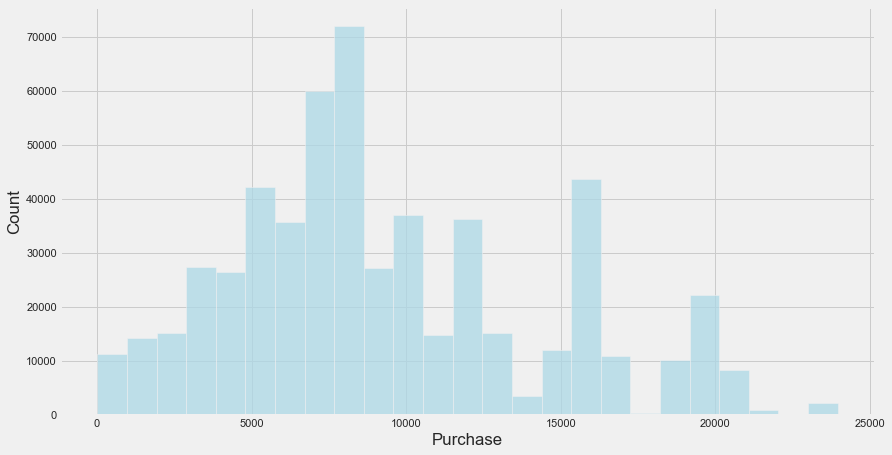

In [22]:
# distribution of purchase and it shows the target variable is almost having normal distribution and 
#there is not much outliers present
plt.style.use('fivethirtyeight')

plt.figure(figsize=(13, 7))
sns.histplot(df['Purchase'], bins=25 , color ='lightblue')

In [23]:
df['Age'].value_counts() # age is been already binned in the dataset

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

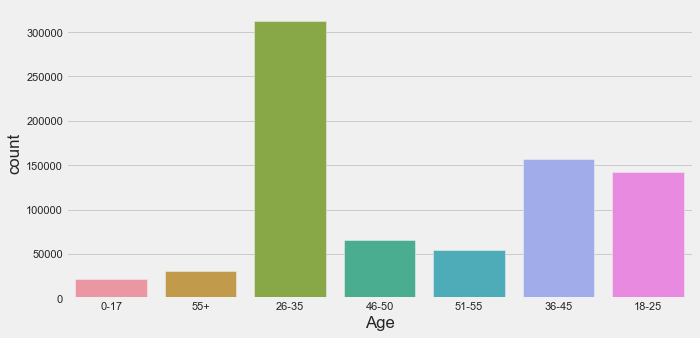

In [24]:
plt.figure(figsize=(10,5))
b = sns.countplot(x='Age', data=df) # the age group 26 -35 have high count compared to other age category

Text(0.5, 1.0, 'Gender Distribution')

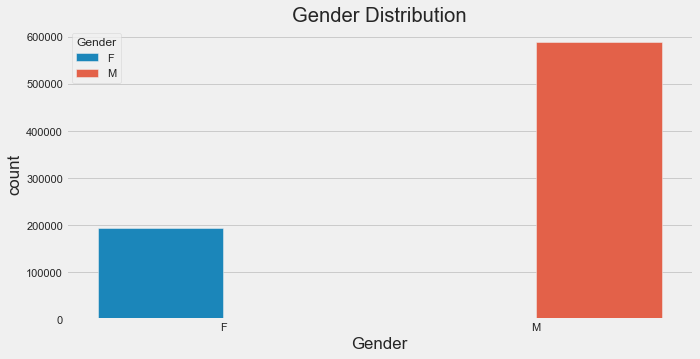

In [25]:
plt.figure(figsize=(10,5))
c = sns.countplot(x='Gender',hue='Gender', data=df) # males have high count compared to females 
c.set_title("Gender Distribution")

Text(0.5, 1.0, 'Occupation Distribution')

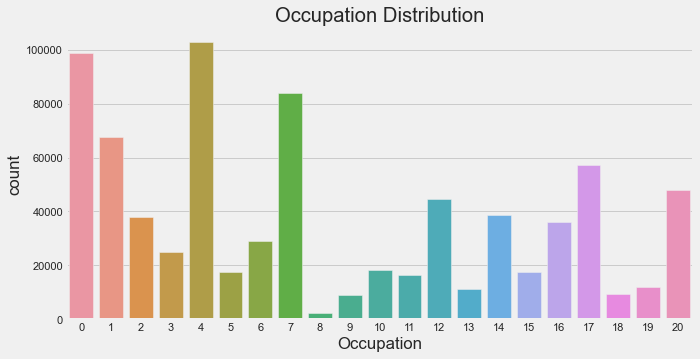

In [26]:
plt.figure(figsize=(10,5))
d=sns.countplot(x='Occupation', data=df)  
d.set_title("Occupation Distribution")
#Occupation level 4 is the highest follwed by 0 and 7 respectively

Text(0.5, 1.0, 'City_Category Distribution')

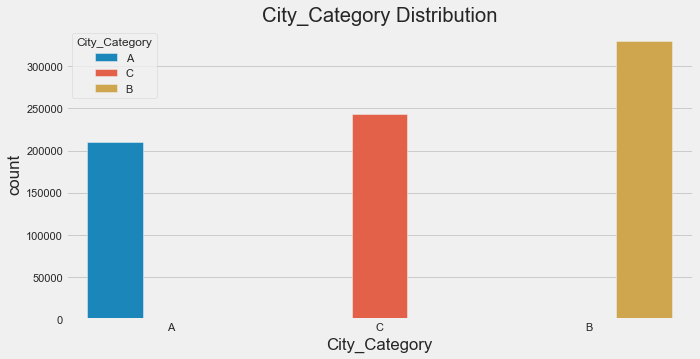

In [27]:
plt.figure(figsize=(10,5))
e=sns.countplot(x='City_Category',hue= 'City_Category', data=df) 
e.set_title("City_Category Distribution")
#City B has highest count compred to other cities

Text(0.5, 1.0, 'Stay_In_Current_City_Years Distribution')

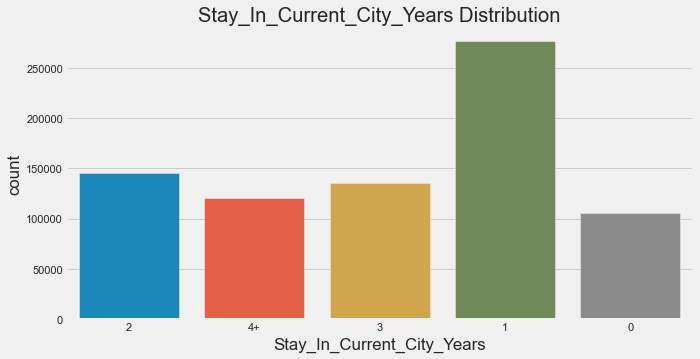

In [28]:
#Stay_In_Current_City_Years
plt.figure(figsize=(10,5))
f=sns.countplot(x='Stay_In_Current_City_Years', data=df) 
f.set_title("Stay_In_Current_City_Years Distribution")
# stay in current city shows majority of people have stayed for 1 year only

Text(0.5, 1.0, 'Marital_Status Distribution')

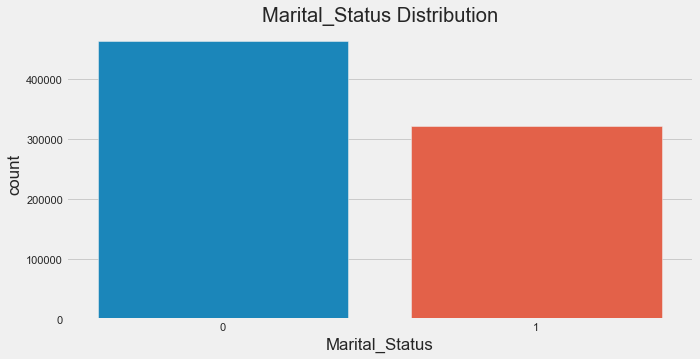

In [29]:
#Stay_In_Current_City_Years
plt.figure(figsize=(10,5))
g=sns.countplot(x='Marital_Status', data=df) 
g.set_title("Marital_Status Distribution")
# the graph shows is not much difference between the 0 and 1 , (this is a masked column)

In [30]:
df.groupby(['Gender']).agg({'Purchase':np.mean})



,Purchase
Gender,
F,8734.565765
M,9437.526040


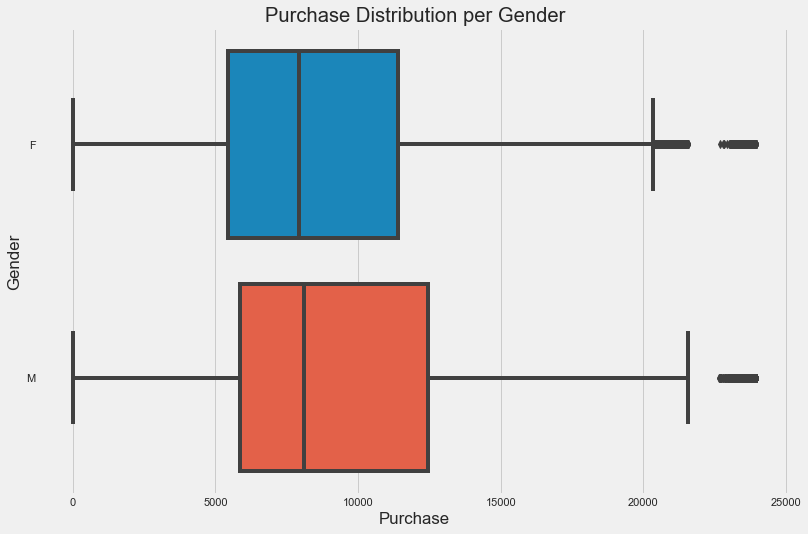

In [31]:
b = sns.boxplot(y='Gender', x='Purchase', data=df);
b.set_title("Purchase Distribution per Gender");

In [32]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)
    LIF=Q1-1.5*(IQR)
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.histplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

count     2677.000000
mean     23238.392230
std        701.671127
min      21401.000000
25%      23154.000000
50%      23418.000000
75%      23684.000000
max      23961.000000
Name: Purchase, dtype: float64

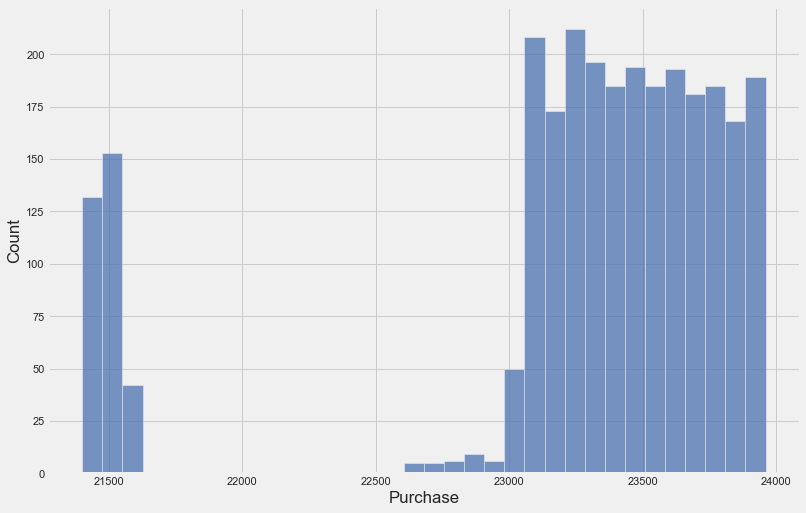

In [33]:
outlier_analysis('Purchase')

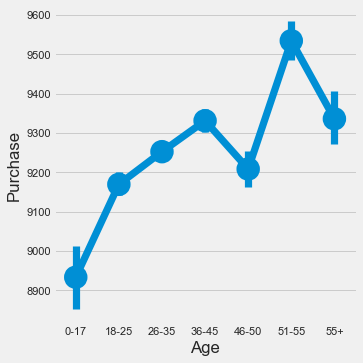

In [34]:
#Variable - Age Vs Purchase
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],)
#Graph shows the age group 51-55 has high purchase of products on black friday

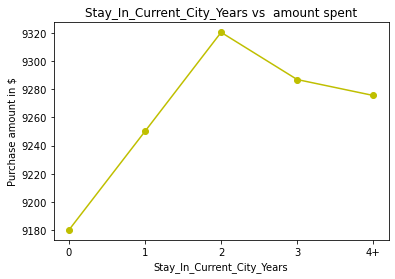

In [12]:
# Avearge amount spend based on the time of stay in the current city

data=df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs  amount spent');
plt.show()

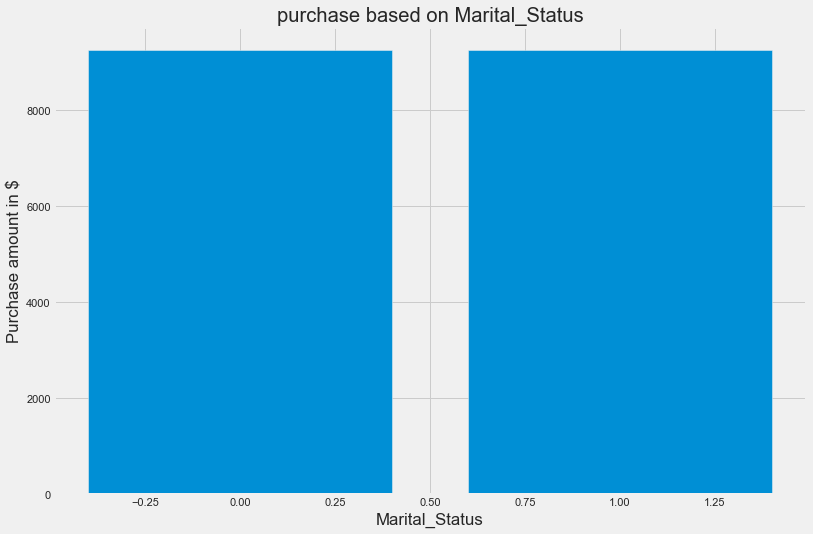

In [160]:
data = df.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Purchase amount in $');
plt.title('purchase based on Marital_Status');
plt.show()

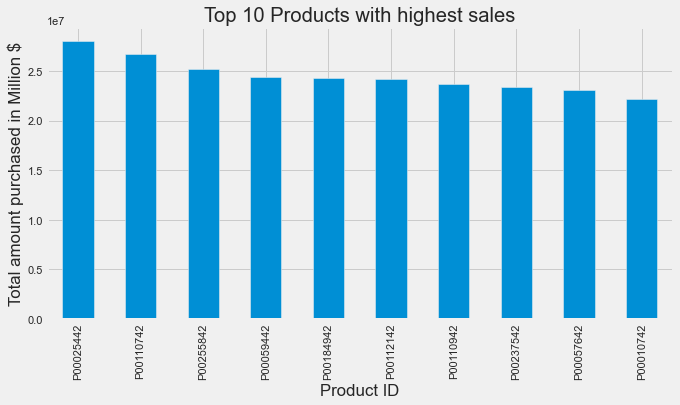

In [37]:
data = df.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

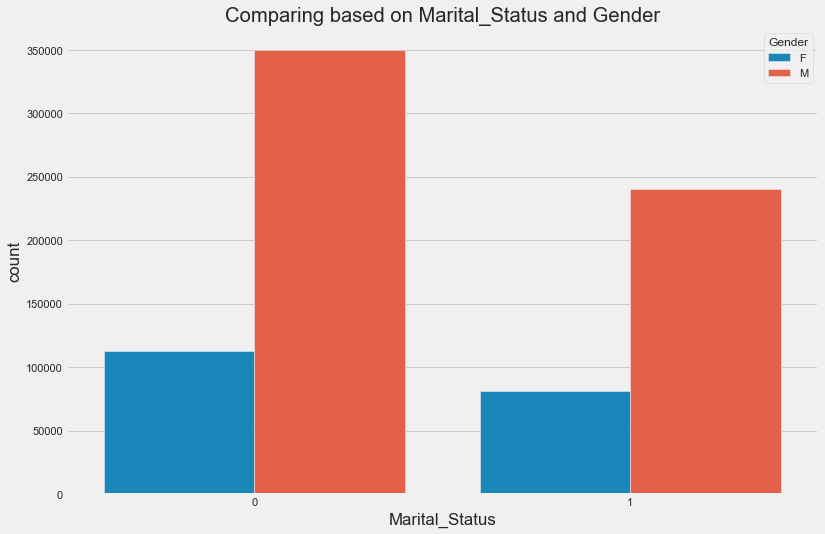

In [38]:
#comparing based on Marital_Status and Gender

sns.countplot(x='Marital_Status',data=df,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

In [39]:
#Products that are most purchased by each of the age group:
a =pd.crosstab(df['Age'],df['Product_ID'])
a.idxmax(axis=1)

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

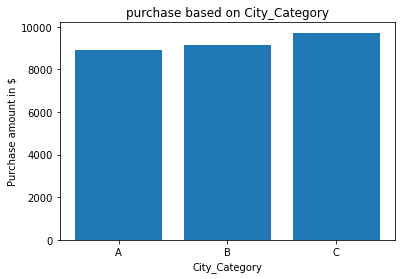

In [14]:
#Purchase and City Category

data = df.groupby('City_Category')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('City_Category');
plt.ylabel('Purchase amount in $');
plt.title('purchase based on City_Category');
plt.show()

C:\Users\Shinu\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


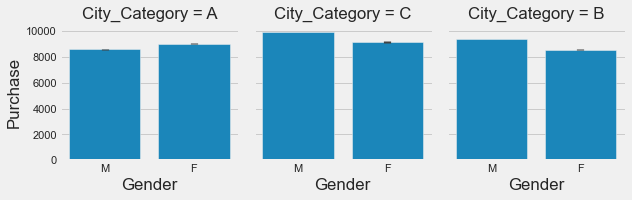

In [41]:
#the purchase habits of different genders across the different city categories.

g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

The Chi-square test statistic can be used if the following conditions are satisfied:

1.N, the total frequency, should be reasonably large, say greater than 50.
2. The sample observations should be independent. This implies that no individual item should be included twice or more in the sample.
3. No expected frequencies should be small. Small is a relative term. Preferably each expected frequencies should be larger than 10 but in any case not less than 5.

In [152]:

from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False

    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at 0.05 significant level")
    else:
        print("\nThere is no correlation between the two variables")

In [153]:
chi_square("Gender", "Purchase")

[[76.06361214 79.82913749 71.54498171 ...  1.50621014  3.01242028
   2.25931521]
 [24.93638786 26.17086251 23.45501829 ...  0.49378986  0.98757972
   0.74068479]]

Chi-square is : 23742.23880904363 

p_value is : 4.441402146544842e-161 

degree of freedom is :18104

There is some correlation between the two variables at 0.05 significant level


In [42]:
df.corr() # correlation matrix for univarate analysis of the columns

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
Marital_Status,1.000000,0.023563,0.019579,0.014174,0.010148,-0.000463,0.020276
Occupation,0.023563,1.000000,-0.008441,-0.000639,0.005725,0.020833,-0.023976
Product_Category_1,0.019579,-0.008441,1.000000,0.379659,0.083383,-0.343703,0.004568
Product_Category_2,0.014174,-0.000639,0.379659,1.000000,0.319928,-0.179365,0.001902
Product_Category_3,0.010148,0.005725,0.083383,0.319928,1.000000,-0.012284,0.001377
Purchase,-0.000463,0.020833,-0.343703,-0.179365,-0.012284,1.000000,0.004716
User_ID,0.020276,-0.023976,0.004568,0.001902,0.001377,0.004716,1.000000


<AxesSubplot:>

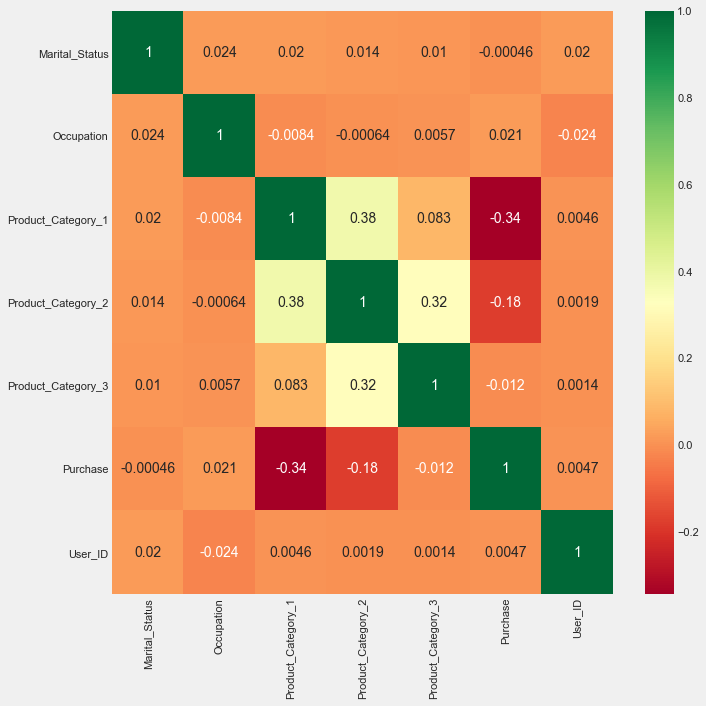

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

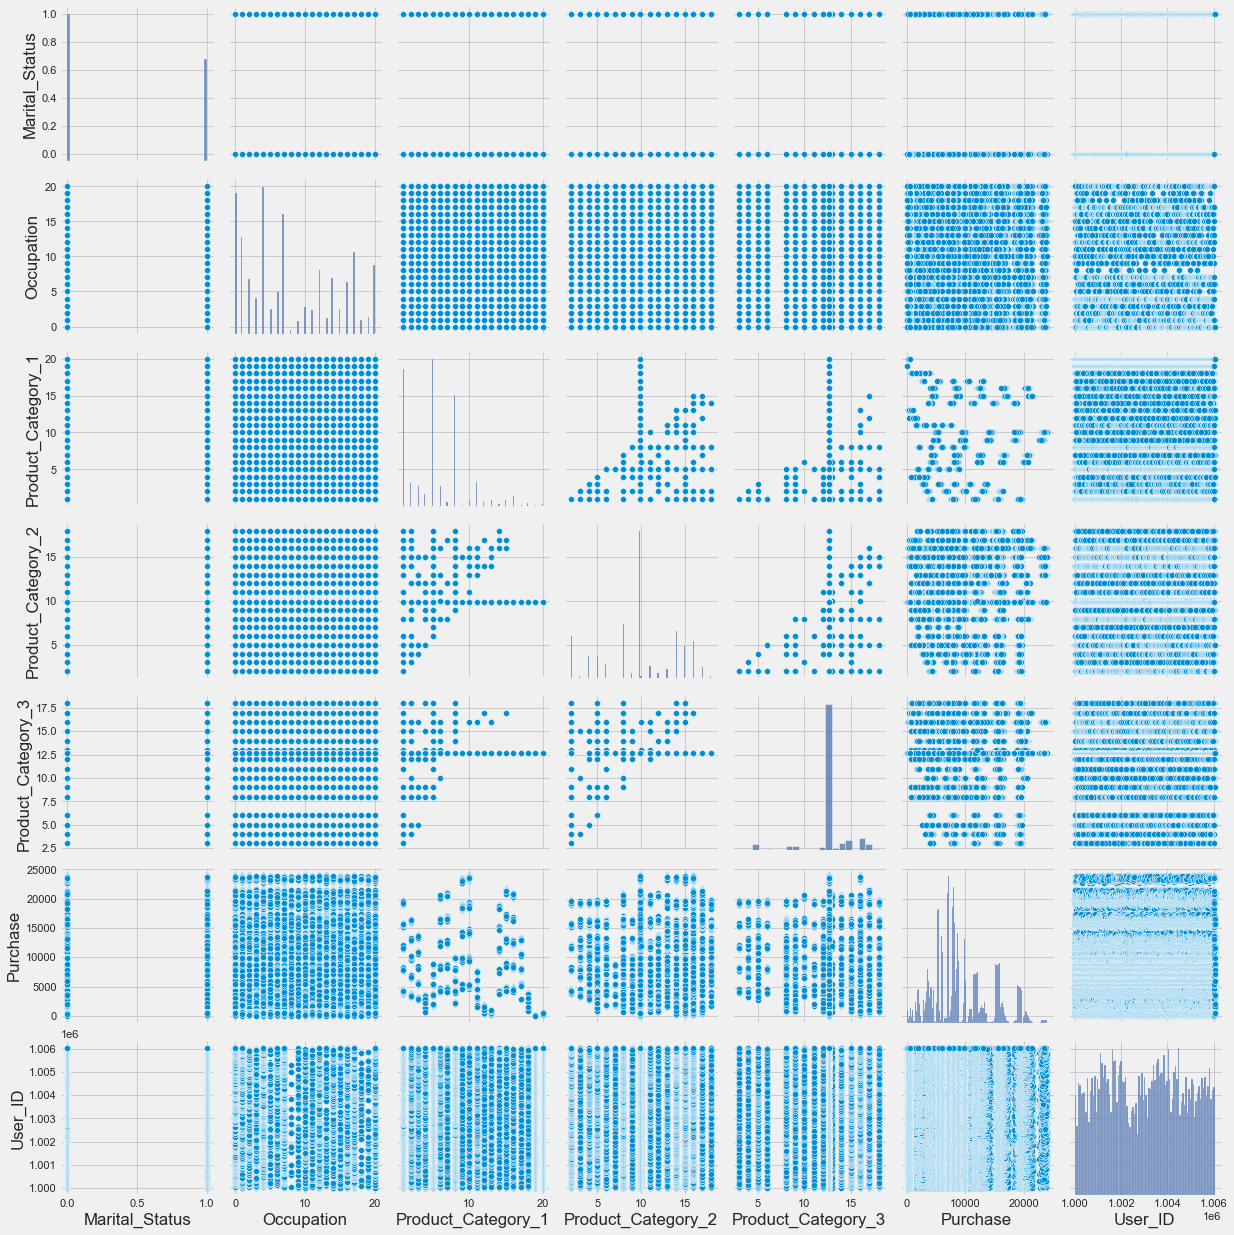

In [44]:
sns.pairplot(df)

#### Top selling product categories

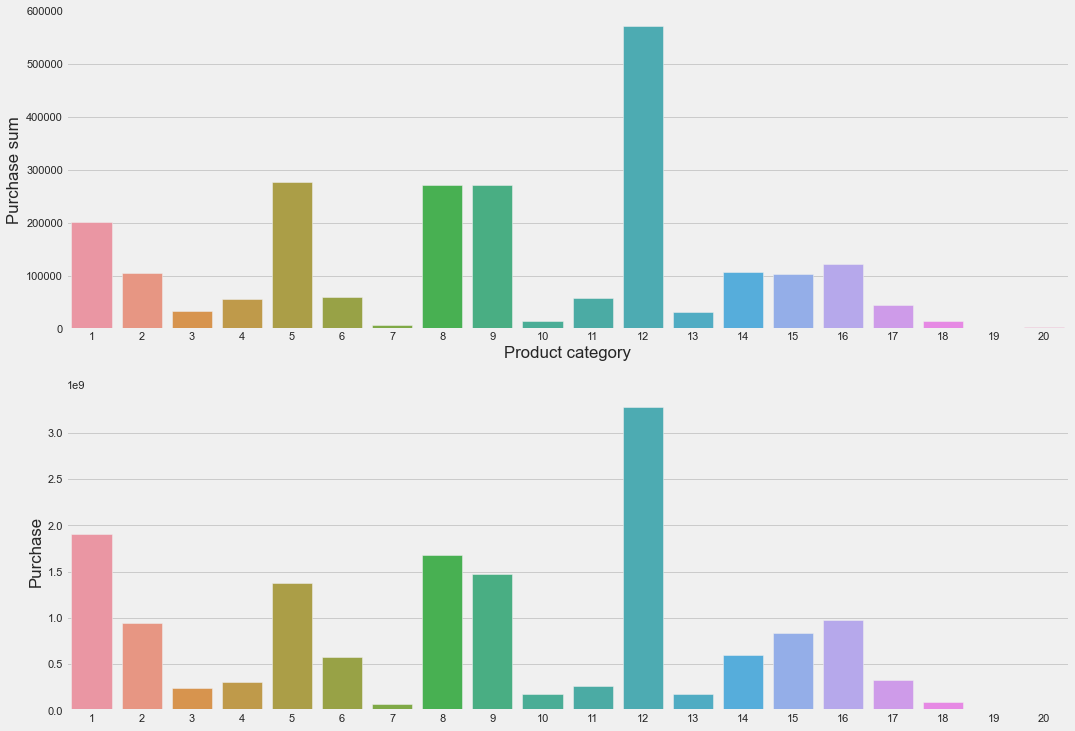

In [145]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

cat_1_count = df['Product_Category_1'].value_counts()
cat_2_count = df['Product_Category_2'].value_counts()
cat_2_count.index = cat_2_count.index.astype(int)
cat_3_count = df['Product_Category_3'].value_counts()
cat_3_count.index = cat_3_count.index.astype(int)
cat_count = cat_1_count.add(cat_2_count, fill_value=0)
cat_count = cat_count.add(cat_3_count, fill_value=0)
sns.barplot(ax=axes[0], x=cat_count.index, y=cat_count)
axes[0].set_xlabel('Product category')
axes[0].set_ylabel('Purchase count')

cat_1_sum = df.groupby('Product_Category_1')['Purchase'].sum()
cat_2_sum = df.groupby('Product_Category_2')['Purchase'].sum()
cat_2_sum.index = cat_2_sum.index.astype(int)
cat_3_sum = df.groupby('Product_Category_3')['Purchase'].sum()
cat_3_sum.index = cat_3_sum.index.astype(int)
cat_sum = cat_1_sum.add(cat_2_sum, fill_value=0)
cat_sum = cat_sum.add(cat_3_sum, fill_value=0)
sns.barplot(ax=axes[1], x=cat_sum.index, y=cat_sum)
axes[0].set_xlabel('Product category')
axes[0].set_ylabel('Purchase sum')

plt.show()

## Data Cleaning

In [10]:
df["Product_Category_2"].describe() # Doing analysis of the column to fill null values  

count    537685.000000
mean          9.844506
std           5.089093
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [11]:
df["Product_Category_3"].describe()

count    237858.000000
mean         12.668605
std           4.125510
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

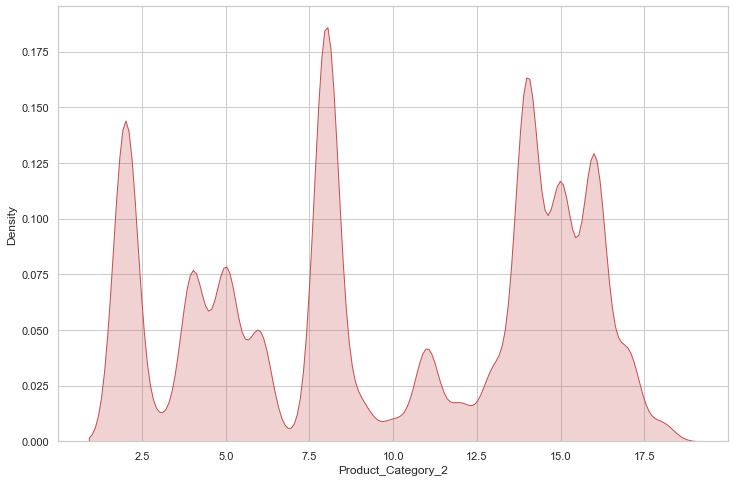

In [14]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# plotting both distibutions on the same figure
fig = sns.kdeplot(df['Product_Category_2'], shade=True, color="r")

plt.show()

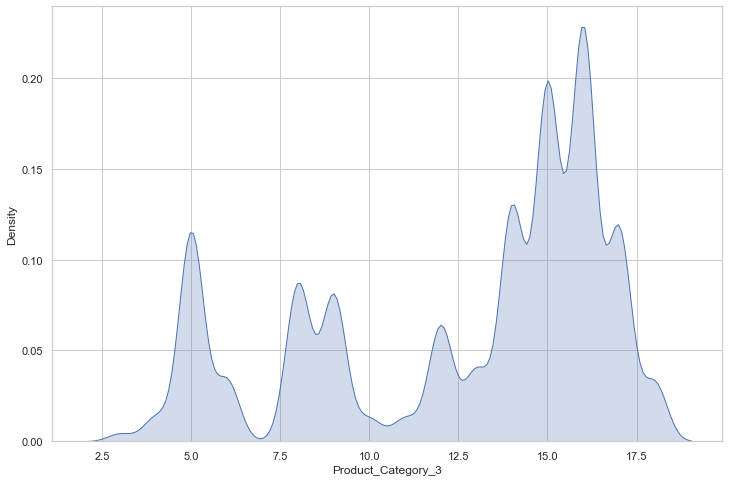

In [15]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# plotting both distibutions on the same figure

fig = sns.kdeplot(df['Product_Category_3'], shade=True, color="b")
plt.show()

Note - If the data seems right or left handed skewed then we have to first convert it and then we can replace null values with mean or median.

Hence for missing values we are going to use mean

In [16]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(),inplace=True)

In [17]:
df.isnull().sum() # checking for anymore null values , The purchase column shows the test data 

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
source                             0
dtype: int64

The null values shown for purchase above belongs to the test dataset

### REPLACING VALUES

In [47]:
# REMOVING THE BINS FROM AGE COLUMN

In [48]:
df['Age']=df['Age'].replace('0-17',17)
df['Age']=df['Age'].replace('18-25',25)
df['Age']=df['Age'].replace('26-35',35)
df['Age']=df['Age'].replace('36-45',45)
df['Age']=df['Age'].replace('46-50',50)
df['Age']=df['Age'].replace('51-55',55)
df['Age']=df['Age'].replace('55+',60)

In [49]:
# REMOVING '+' SIGN FROM Stay_In_Current_City_Years '4+' 

In [50]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)

#### Changing the data types

In [51]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int)

In [52]:
df['Product_Category_2']=df['Product_Category_2'].astype('int64')

In [53]:
df['Product_Category_3']=df['Product_Category_3'].astype('int64')

In [54]:
df['Purchase']=df['Purchase'].astype('double')

In [55]:
df.head(10)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,source
0,17,1,1,0,10,3,9,12,P00069042,8370.0,2,1000001,train
1,17,1,1,0,10,1,6,14,P00248942,15200.0,2,1000001,train
2,17,1,1,0,10,12,9,12,P00087842,1422.0,2,1000001,train
3,17,1,1,0,10,12,14,12,P00085442,1057.0,2,1000001,train
4,60,3,0,0,16,8,9,12,P00285442,7969.0,4,1000002,train
5,35,1,0,0,15,1,2,12,P00193542,15227.0,3,1000003,train
6,50,2,0,1,7,1,8,17,P00184942,19215.0,2,1000004,train
7,50,2,0,1,7,1,15,12,P00346142,15854.0,2,1000004,train
8,50,2,0,1,7,1,16,12,P0097242,15686.0,2,1000004,train
9,35,1,0,1,20,8,9,12,P00274942,7871.0,1,1000005,train


## Market basket analysis using association rules (FP-Growth Algorithm)

Association Rules is one of the very important concepts of machine learning being used in market basket analysis

Investing time and resources on deliberate product placements like this not only reduces a customer’s shopping time, but also reminds the customer of what relevant items (s)he might be interested in buying, thus helping stores cross-sell in the process. Association rules help uncover all such relationships between items from huge databases. One important thing to note is Rules do not extract an individual’s preference, rather find relationships between set of elements of every distinct transaction. This is what makes them different from collaborative filtering.


1. Support:-
This measure gives an idea of how frequent an itemset is in all the transactions. 

2. Confidence:-
This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents

3. Lift:-
Lift controls for the support (frequency) of consequent while calculating the conditional probability of occurrence of {Y} given {X}
Here “x” is Antecedent, and “y” is Consequent

Example of Itemset and Antecedent and consequent

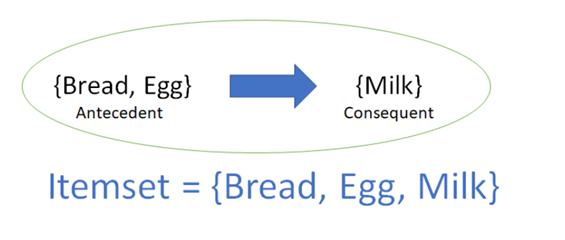



In [155]:
#Perform data transformation
from mlxtend.frequent_patterns import association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
basket = list(train.groupby('User_ID')['Product_ID'].apply(list).values)

te = TransactionEncoder()
tmp_arr = te.fit(basket).transform(basket, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(tmp_arr, columns=te.columns_)

In [156]:
#Find association rules
#Thresholds: minimum support = 0.03, lift = 1, confidence = 0.5

frequent_itemsets = fpgrowth(sparse_df, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules = rules[rules['confidence'] >= 0.5].sort_values(by=['lift', 'confidence'], ascending=False)
rules = rules.reset_index(drop=True)

print(f'Total number of rules found: {rules.shape[0]}\n')
antecedent_lengths = rules['antecedents'].apply(lambda x: len(x))
for n in np.unique(antecedent_lengths):
    print(f'\nNumber of rules with {n} antecedent(s): {rules[antecedent_lengths == n].shape[0]}')
    print('Rules with highest lift value:')
    display(rules[antecedent_lengths == n].reset_index(drop=True).head())
    


Total number of rules found: 716


Number of rules with 1 antecedent(s): 132
Rules with highest lift value:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(P00070942),(P00106742),0.064335,0.083347,0.032422,0.503958,6.046467,0.027060,1.847932
1,(P00127442),(P00125942),0.090986,0.123069,0.046851,0.514925,4.184035,0.035654,1.807827
2,(P00100942),(P00106042),0.087082,0.153624,0.044814,0.514620,3.349863,0.031436,1.743738
3,(P00182242),(P00182142),0.098286,0.154303,0.050246,0.511226,3.313129,0.035080,1.730242
4,(P00058142),(P00085942),0.068579,0.163470,0.034290,0.500000,3.058671,0.023079,1.673061



Number of rules with 2 antecedent(s): 584
Rules with highest lift value:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(P00112542, P00105142)",(P00111142),0.057206,0.172297,0.030555,0.534125,3.100028,0.020699,1.776662
1,"(P00329542, P00057642)",(P00270942),0.059752,0.195553,0.034120,0.571023,2.920048,0.022435,1.875268
2,"(P00057642, P00127642)",(P00270942),0.058903,0.195553,0.032762,0.556196,2.844228,0.021243,1.812619
3,"(P00057642, P00140742)",(P00270942),0.066033,0.195553,0.036157,0.547558,2.800055,0.023244,1.778012
4,"(P00057642, P00243942)",(P00270942),0.056527,0.195553,0.030895,0.546547,2.794883,0.019841,1.774046


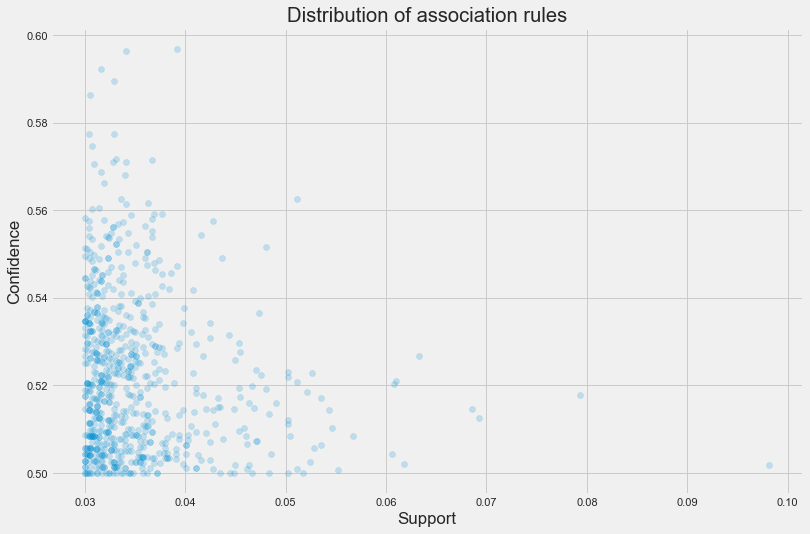

In [157]:
plt.figure(figsize=(12, 8))
plt.scatter(rules['support'], rules['confidence'], alpha=0.2)
plt.title('Distribution of association rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

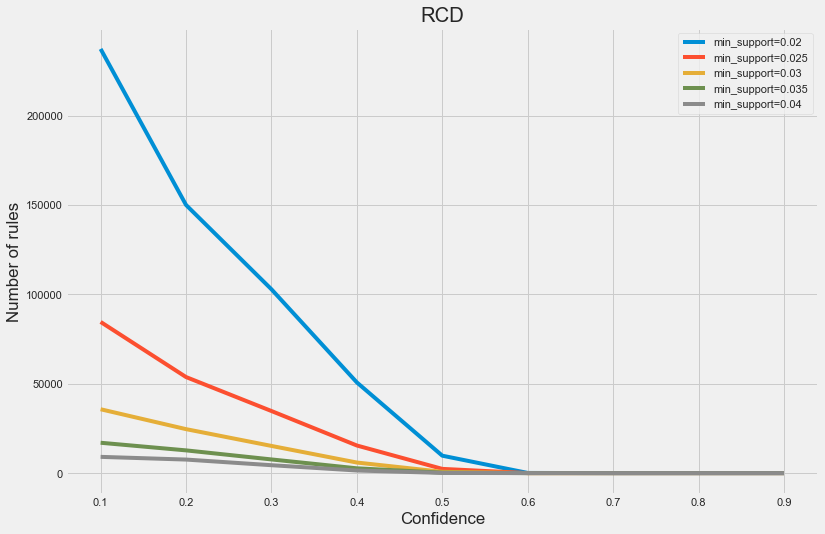

In [158]:
support_vals = (0.02, 0.025, 0.03, 0.035, 0.04)
confidence_vals = np.arange(0.1, 1, 0.1)
plt.figure(figsize=(12,8))
for s in support_vals:
    frequent_itemsets_tmp = fpgrowth(sparse_df, min_support=s, use_colnames=True)
    n_rules = []
    for c in confidence_vals:
        rules_tmp = association_rules(frequent_itemsets_tmp, metric='confidence', min_threshold=c)
        n_rules.append(rules_tmp.shape[0])
    plt.plot(confidence_vals, n_rules, label=f'min_support={s}')
plt.title('RCD')
plt.xlabel('Confidence')
plt.ylabel('Number of rules')
plt.legend()
plt.show()

## Feature Engineering

### LABEL ENCODING

Label encoding for columns Gender and City Category

In [46]:
df.City_Category = df.City_Category.map(
                    {
                        'A': 1,
                        'B': 2,
                        'C': 3
                    }
                    )

In [45]:
df.Gender = df.Gender.map(
                    {
                        'M': 0,
                        'F': 1
                    }
                    )

In [56]:
# For the base level -- Creating a copy droping the test data
data= df.copy(deep=True)
data.to_csv("Preditct_BlackFridaySales.csv",index=False)

### Segregating train test data¶


In [57]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

In [58]:
#Drop unnecessary columns:
test.drop(['Purchase','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("BFS_2021_train_modified.csv",index=False)
test.to_csv("BFS_2021_test_modified.csv",index=False)

C:\Users\Shinu\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
train.head(6)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,17,1,1,0,10,3,9,12,P00069042,8370.0,2,1000001
1,17,1,1,0,10,1,6,14,P00248942,15200.0,2,1000001
2,17,1,1,0,10,12,9,12,P00087842,1422.0,2,1000001
3,17,1,1,0,10,12,14,12,P00085442,1057.0,2,1000001
4,60,3,0,0,16,8,9,12,P00285442,7969.0,4,1000002
5,35,1,0,0,15,1,2,12,P00193542,15227.0,3,1000003


### Identifying and extracting the Dependent and Independent Variable

Dependant variable:- Purchase

Independant Variable: Age, City_Category, Gender, Marital_Status, Occupation, Product_Category_1, Product_Category_2, Product_Category_3, Stay_In_Current_City_Years

Dropping Variables : Product_ID , User_ID

In [63]:
#Shuffle the rows of the dataframe
shuf = train.sample(frac = 1, random_state=0)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)

## Modelling

In [99]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['Age','City_Category','Gender','Marital_Status','Occupation','Product_Category_1','Product_Category_2','Product_Category_3',
        'Stay_In_Current_City_Years']
from sklearn import model_selection, metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


LR Model Report
LR_RMSE : 4688
CV Score : Mean - 4690 | Std - 39.31 | Min - 4569 | Max - 4741


<ipython-input-143-62cfef983904>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

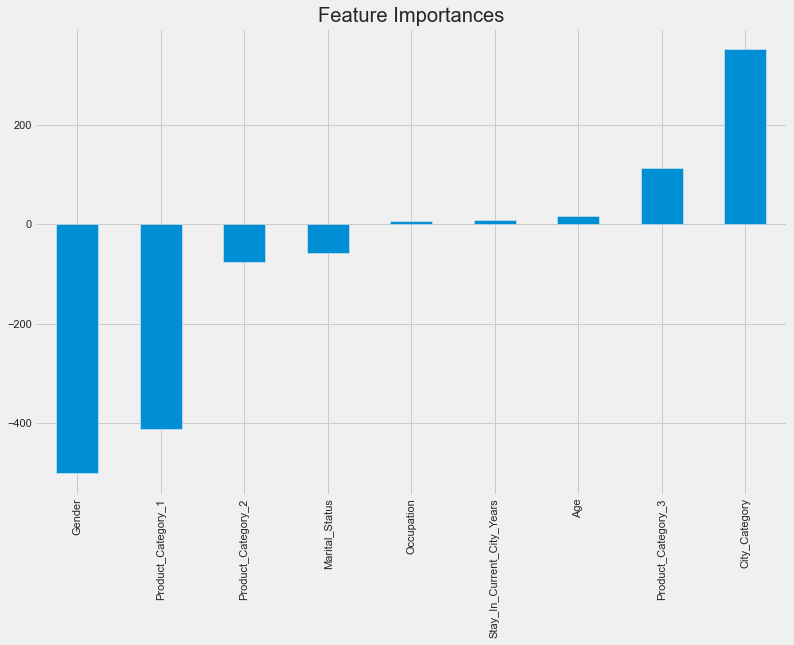

In [143]:
LR = LinearRegression(normalize=True)

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
    print("\nLR Model Report")
    print("LR_RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

predictors = train.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train, test, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Feature Importances')




 Ridge Model Report
Ridge_RMSE : 4688
CV Score : Mean - 4691 | Std - 34.14 | Min - 4603 | Max - 4739


<ipython-input-135-5afbd5ca7168>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

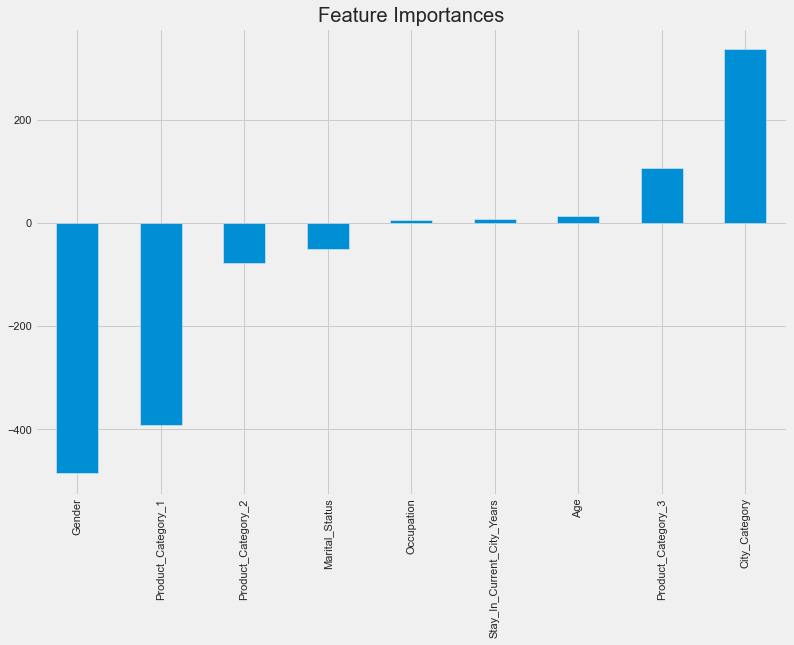

In [135]:
from sklearn.linear_model import  Ridge, Lasso
R_Reg = Ridge(alpha=0.05,normalize=True)
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\n Ridge Model Report")
    print("Ridge_RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
modelfit(R_Reg, train, test, predictors, target, IDcol, 'R_Reg.csv')
coef2 = pd.Series(R_Reg.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Feature Importances')


 Lasso Model Report
Lasso_RMSE : 4775
CV Score : Mean - 4776 | Std - 50.12 | Min - 4716 | Max - 4965


<ipython-input-136-bf2ebe1c6f8a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

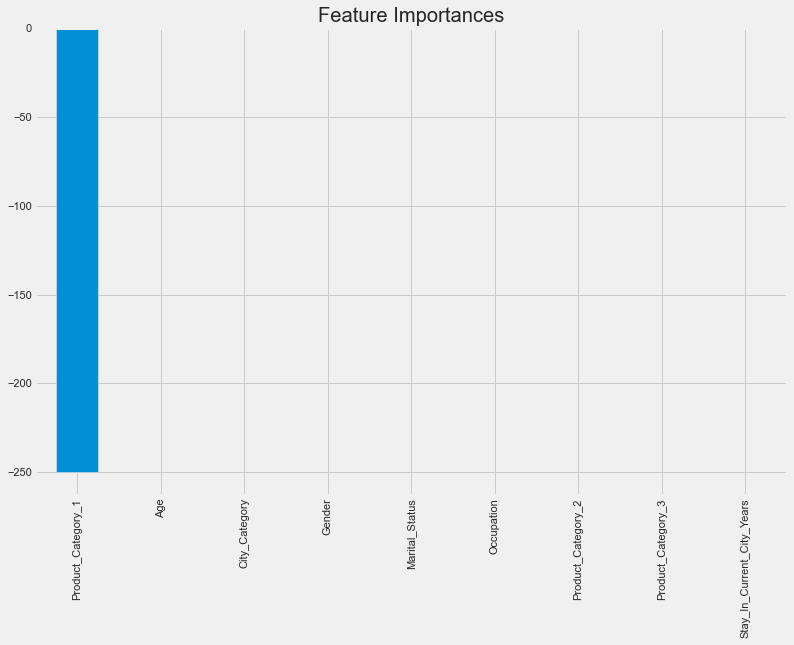

In [136]:
La_Reg = Lasso(alpha=1.0,normalize=True)
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\n Lasso Model Report")
    print("Lasso_RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
modelfit(La_Reg, train, test, predictors, target, IDcol, 'La_Reg.csv')
coef3 = pd.Series(La_Reg.coef_, predictors).sort_values()
coef3.plot(kind='bar', title='Feature Importances')


 DT Model Report
DT_RMSE : 2902
CV Score : Mean - 2943 | Std - 20.1 | Min - 2906 | Max - 2973


<ipython-input-137-2e66faee2443>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

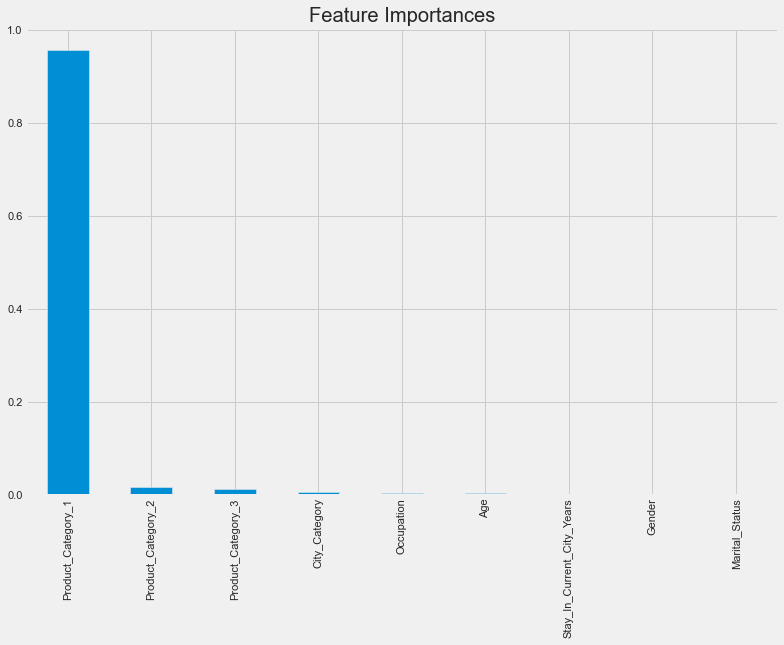

In [137]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\n DT Model Report")
    print("DT_RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
modelfit(DT, train, test, predictors, target, IDcol, 'DT.csv')

coef4 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')


RFR Model Report
RFR_RMSE : 3266
CV Score : Mean - 3396 | Std - 28.29 | Min - 3320 | Max - 3442


<ipython-input-138-d73088be4280>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

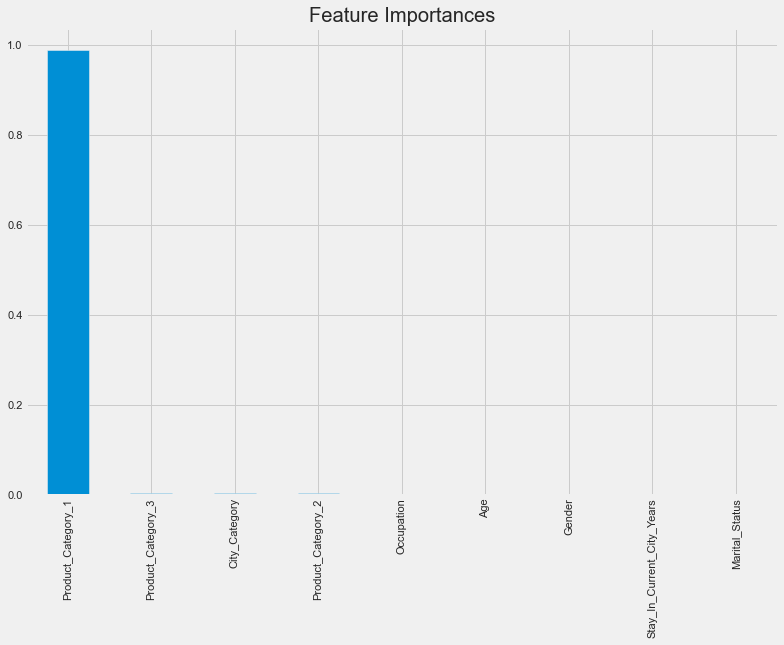

In [138]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nRFR Model Report")
    print("RFR_RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
modelfit(RFR, train, test, predictors, target, IDcol, 'RFR.csv')
coef5 = pd.Series(RFR.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


XG Model Report
XG_RMSE : 2618
CV Score : Mean - 2873 | Std - 20.99 | Min - 2834 | Max - 2905


<ipython-input-139-7c5a06dc803e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

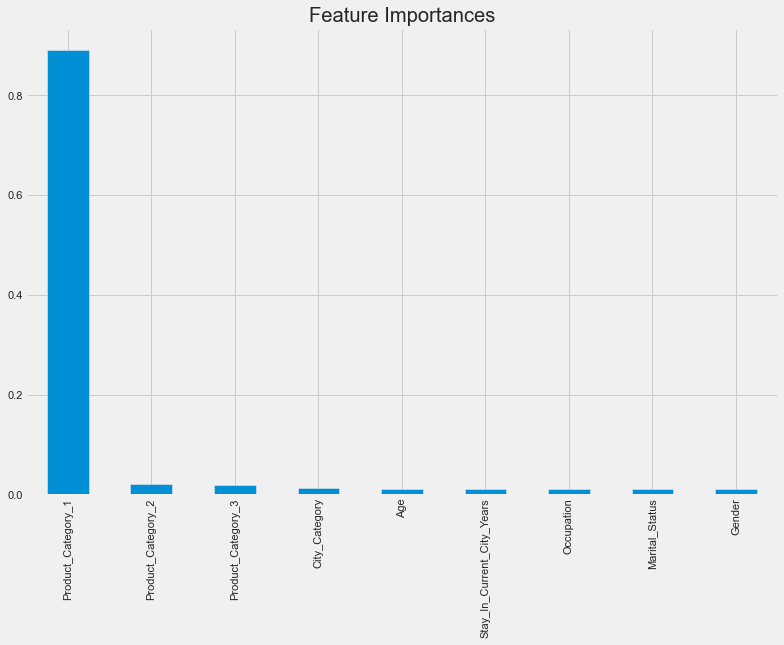

In [139]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb=XGBRegressor(random_state=1,n_estimators= 61, max_depth=11)
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nXG Model Report")
    print("XG_RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
modelfit(xgb, train, test, predictors, target, IDcol, 'xgb.csv')
coef6 = pd.Series(xgb.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

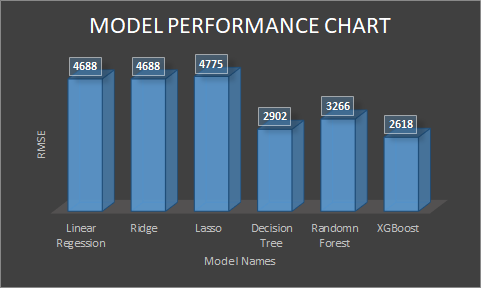

What is RMSE?

RMSE : Root Mean Square Error

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.

RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

Lower values of RMSE indicate better fit

Purpose of RSME :

1)to serve as a heuristic for training models

2)to evaluate trained models for usefulness/accuracy


## Conclusion 

From the graph we can see that XGboost model has a low Error score compared to Others model


Since the details of the columns have been masked, so giving an accurate suggestion is quite difficult, but from the above analysis we can see that female customers can be tapped to buy more with gender based promotions  and the lesser age category can be attracted by more promotions or lesser price  because income level . The other two city category have a lot of potential buyers if offers and promotions can be customized according to the city type customer can be attracted more.